<a href="https://colab.research.google.com/github/Priyal95/Airbnb-New-York_ML-Project/blob/main/Airbnb_New_York_Priyal_Shah_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New York-New York_Property_2017-03-01.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,...,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Listing URL,Listing Main Image URL,Latitude,Longitude
0,105.0,500.0,Trendy Times Square Loft,Apartment,Private room,2008-06-28,2016-03-18,United States,New York,New York,...,0.0,366.0,0.0,25.0,False,No,https://www.airbnb.com/rooms/105,https://a0.muscache.com/im/pictures/59366/b695...,40.762099,-73.996022
1,795.0,1061.0,Sky Chelsea 3 bdr,Apartment,Entire home/apt,2008-07-25,2016-03-02,United States,New York,New York,...,0.0,366.0,0.0,22.0,False,No,https://www.airbnb.com/rooms/795,https://a2.muscache.com/im/pictures/a849796f-a...,40.746257,-74.007022
2,2515.0,2758.0,Stay at Chez Chic budget room #1,Apartment,Private room,2008-09-05,2017-03-01,United States,New York,New York,...,239.0,106.0,21.0,11.0,False,No,https://www.airbnb.com/rooms/2515,https://a0.muscache.com/im/pictures/88569/eebe...,40.799205,-73.953676
3,2534.0,2782.0,"The Nest: Cozy, Quiet, Clean, Sunny",Apartment,Entire home/apt,2008-09-06,2016-02-19,United States,New York,New York,...,103.0,8.0,255.0,16.0,False,No,https://www.airbnb.com/rooms/2534,https://a2.muscache.com/im/pictures/7a147a6c-e...,40.762059,-73.961365
4,2539.0,2787.0,Clean & quiet apt home by the park,Apartment,Private room,2008-09-07,2016-11-19,United States,New York,New York,...,38.0,328.0,0.0,12.0,False,No,https://www.airbnb.com/rooms/2539,https://a2.muscache.com/im/pictures/3949d073-a...,40.647486,-73.972370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,16905634.0,1009903.0,Comfort and coziness,Apartment,Entire home/apt,2017-01-23,2017-02-05,United States,New York,New York,...,0.0,31.0,0.0,7.0,False,Yes,https://www.airbnb.com/rooms/16905634,https://a0.muscache.com/im/pictures/23fad023-0...,40.735170,-74.005583
86005,16908288.0,24120303.0,Fresh Shared Space,Apartment,Shared room,2017-01-23,2017-02-03,United States,New York,New York,...,0.0,31.0,0.0,8.0,False,No,https://www.airbnb.com/rooms/16908288,https://a0.muscache.com/im/pictures/e9073702-1...,40.706625,-73.949328
86006,16909197.0,24120303.0,Fun Cozy Environment,Apartment,Shared room,2017-01-23,2017-02-03,United States,New York,New York,...,0.0,28.0,3.0,6.0,False,No,https://www.airbnb.com/rooms/16909197,https://a0.muscache.com/im/pictures/5d626c2a-3...,40.707130,-73.949391
86007,16909522.0,24120303.0,Chilled Shared Space,Apartment,Shared room,2017-01-23,2017-02-02,United States,New York,New York,...,0.0,31.0,0.0,9.0,False,No,https://www.airbnb.com/rooms/16909522,https://a0.muscache.com/im/pictures/6db0080f-8...,40.707067,-73.949980


# Data Exploration/Cleaning


# Data Engineering

In [ ]:
data.dtypes

Property ID                      float64
Host ID                          float64
Listing Title                     object
Property Type                     object
Listing Type                      object
Created Date                      object
Last Scraped Date                 object
Country                           object
State                             object
City                              object
Zipcode                          float64
Neighborhood                      object
Metropolitan Statistical Area     object
Average Daily Rate               float64
Annual Revenue LTM               float64
Occupancy Rate LTM               float64
Number of Bookings LTM           float64
Number of Reviews                float64
Overall Rating                   float64
Bedrooms                         float64
Bathrooms                        float64
Max Guests                       float64
Calendar Last Updated             object
Response Rate                    float64
Response Time (m

In [ ]:
data.shape

(86009, 46)

In [ ]:
(data.isna().sum())/len(data)

Property ID                      0.000012
Host ID                          0.000012
Listing Title                    0.000023
Property Type                    0.000035
Listing Type                     0.000012
Created Date                     0.000012
Last Scraped Date                0.000012
Country                          0.000012
State                            0.000012
City                             0.000012
Zipcode                          0.000012
Neighborhood                     0.001779
Metropolitan Statistical Area    0.000012
Average Daily Rate               0.262961
Annual Revenue LTM               0.000012
Occupancy Rate LTM               0.262961
Number of Bookings LTM           0.000012
Number of Reviews                0.000012
Overall Rating                   0.347487
Bedrooms                         0.001384
Bathrooms                        0.003709
Max Guests                       0.000012
Calendar Last Updated            0.021207
Response Rate                    0

In [ ]:
data.isna().sum()

Property ID                          1
Host ID                              1
Listing Title                        2
Property Type                        3
Listing Type                         1
Created Date                         1
Last Scraped Date                    1
Country                              1
State                                1
City                                 1
Zipcode                              1
Neighborhood                       153
Metropolitan Statistical Area        1
Average Daily Rate               22617
Annual Revenue LTM                   1
Occupancy Rate LTM               22617
Number of Bookings LTM               1
Number of Reviews                    1
Overall Rating                   29887
Bedrooms                           119
Bathrooms                          319
Max Guests                           1
Calendar Last Updated             1824
Response Rate                    36590
Response Time (min)              24443
Superhost                

In [ ]:
#Variables Dropped
#One value variables: City, Country 
#Unneeded variables: Listing URL, Listing Main Image URL, Latitude, Longitude, Metropolitan Statistical Area, state
#Checkout/Check-in Time variables had too many NA values, and had too many character variations making it difficult to format .
print('City:', data.City.unique())
print('Country:',data.Country.unique())
print('Metropolitan Statistical Area:', data['Metropolitan Statistical Area'].unique())
print('Check-in Time:', data['Check-in Time'].unique()[:4])


City: ['New York' nan]
Country: ['United States' nan]
Metropolitan Statistical Area: ['New York-Newark-Jersey City, NY-NJ-PA Metro Area' nan]
Check-in Time: ['4:00 PM' nan '8AM - 2AM (next day)' 'Flexible']


In [ ]:
#Dropping variables
data2=data.drop(columns=['City', 'State',"Country", "Listing URL", "Listing Main Image URL", "Latitude", "Longitude", "Checkout Time", "Check-in Time","Metropolitan Statistical Area"])
data2.shape


(86009, 36)

In [ ]:
data2

,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Zipcode,Neighborhood,Average Daily Rate,...,Published Nightly Rate,Published Monthly Rate,Published Weekly Rate,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled
0,105.0,500.0,Trendy Times Square Loft,Apartment,Private room,2008-06-28,2016-03-18,10036.0,Midtown,NaN,...,549.0,15000.0,5000.0,1.0,0.0,366.0,0.0,25.0,False,No
1,795.0,1061.0,Sky Chelsea 3 bdr,Apartment,Entire home/apt,2008-07-25,2016-03-02,10011.0,Chelsea,NaN,...,300.0,8400.0,2100.0,1.0,0.0,366.0,0.0,22.0,False,No
2,2515.0,2758.0,Stay at Chez Chic budget room #1,Apartment,Private room,2008-09-05,2017-03-01,10026.0,Harlem,104.99,...,99.0,1690.0,720.0,2.0,239.0,106.0,21.0,11.0,False,No
3,2534.0,2782.0,"The Nest: Cozy, Quiet, Clean, Sunny",Apartment,Entire home/apt,2008-09-06,2016-02-19,10065.0,Upper East Side,151.79,...,145.0,4060.0,1015.0,3.0,103.0,8.0,255.0,16.0,False,No
4,2539.0,2787.0,Clean & quiet apt home by the park,Apartment,Private room,2008-09-07,2016-11-19,11218.0,Kensington,70.18,...,64.0,999.0,299.0,1.0,38.0,328.0,0.0,12.0,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,16905634.0,1009903.0,Comfort and coziness,Apartment,Entire home/apt,2017-01-23,2017-02-05,10014.0,West Village,NaN,...,134.0,3752.0,938.0,1.0,0.0,31.0,0.0,7.0,False,Yes
86005,16908288.0,24120303.0,Fresh Shared Space,Apartment,Shared room,2017-01-23,2017-02-03,11206.0,Williamsburg,NaN,...,56.0,1036.0,259.0,3.0,0.0,31.0,0.0,8.0,False,No
86006,16909197.0,24120303.0,Fun Cozy Environment,Apartment,Shared room,2017-01-23,2017-02-03,11206.0,Williamsburg,NaN,...,51.0,952.0,238.0,2.0,0.0,28.0,3.0,6.0,False,No
86007,16909522.0,24120303.0,Chilled Shared Space,Apartment,Shared room,2017-01-23,2017-02-02,11206.0,Williamsburg,NaN,...,55.0,1008.0,252.0,1.0,0.0,31.0,0.0,9.0,False,No


Originally we wanted to use Average Daily Rate as our price predictor as it gives the most accurate representation of a price over time.

However it has many NAs (26%), instead of dropping them we decided to engineer an appropriate value to replace the missing values. 


In [ ]:
print(data2["Average Daily Rate"].isna().sum())
print('Average Daily Rate percentage:',(data2["Average Daily Rate"].isna().sum())/len(data2["Average Daily Rate"]))

22617
Average Daily Rate percentage: 0.2629608529339953


In [ ]:
#Finding only the NA Average Daily Rate (ADR)
adr_null=data2[data2['Average Daily Rate'].isnull()]

#Grouping by neighborhoods
len(adr_null['Neighborhood']) *0.6
sum(adr_null['Neighborhood'].value_counts().head(12))
adr_null['Neighborhood'].value_counts().head(12)

#top 12 neighborhoods
top_12 =['Williamsburg', 'Harlem', 'Brooklyn', 'Midtown', 'Bushwick', 'East Village', 'Upper West Side', 'Upper East Side', 'Crown Heights', 'Lower East Side', 'Astoria', 'Washington Heights']
data3=data2[data2['Neighborhood'].isin(['Williamsburg', 'Harlem', 'Brooklyn', 'Midtown', 'Bushwick', 'East Village', 'Upper West Side', 'Upper East Side', 'Crown Heights', 'Lower East Side', 'Astoria', 'Washington Heights'])]

#finding the mean of the mode 
data4 =data3.groupby(by=['Neighborhood'], as_index=False)['Average Daily Rate'].agg(pd.Series.mode)
print('Computed ADR:', data4["Average Daily Rate"].mean())
data4


Computed ADR: 87.5


,Neighborhood,Average Daily Rate
0,Astoria,50.0
1,Brooklyn,50.0
2,Bushwick,50.0
3,Crown Heights,50.0
4,East Village,100.0
5,Harlem,100.0
6,Lower East Side,100.0
7,Midtown,100.0
8,Upper East Side,150.0
9,Upper West Side,150.0


Replacing the null values in ADR

- ADR has 22617 null values
- The top 12 reccuring neighborhoods made up 60% of the null values
- We took the mode of these 12 neighborhoods from the original dataset and the mean of their mode.
- replaced all null values with this result 87.5


##Cleaning


Engineering categories and dummies


In [ ]:
#Replacing dummy variables
print('Business Ready:', data2['Business Ready'].unique())
print('Instantbook Enabled:', data2['Instantbook Enabled'].unique())
print('Superhost:', data2['Superhost'].unique())

data5=pd.get_dummies(data2, columns=['Business Ready', 'Instantbook Enabled', 'Superhost' ], drop_first=True)
data5=data5.rename(columns={'Business Ready_True':'Business Ready','Superhost_True':'Superhost', 'Instantbook Enabled_Yes':'Instantbook Enabled'})

Business Ready: [False True nan]
Instantbook Enabled: ['No' 'Yes' nan]
Superhost: [False nan True]


In [ ]:
data5

,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Zipcode,Neighborhood,Average Daily Rate,...,Published Monthly Rate,Published Weekly Rate,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Superhost
0,105.0,500.0,Trendy Times Square Loft,Apartment,Private room,2008-06-28,2016-03-18,10036.0,Midtown,NaN,...,15000.0,5000.0,1.0,0.0,366.0,0.0,25.0,0,0,0
1,795.0,1061.0,Sky Chelsea 3 bdr,Apartment,Entire home/apt,2008-07-25,2016-03-02,10011.0,Chelsea,NaN,...,8400.0,2100.0,1.0,0.0,366.0,0.0,22.0,0,0,0
2,2515.0,2758.0,Stay at Chez Chic budget room #1,Apartment,Private room,2008-09-05,2017-03-01,10026.0,Harlem,104.99,...,1690.0,720.0,2.0,239.0,106.0,21.0,11.0,0,0,0
3,2534.0,2782.0,"The Nest: Cozy, Quiet, Clean, Sunny",Apartment,Entire home/apt,2008-09-06,2016-02-19,10065.0,Upper East Side,151.79,...,4060.0,1015.0,3.0,103.0,8.0,255.0,16.0,0,0,0
4,2539.0,2787.0,Clean & quiet apt home by the park,Apartment,Private room,2008-09-07,2016-11-19,11218.0,Kensington,70.18,...,999.0,299.0,1.0,38.0,328.0,0.0,12.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,16905634.0,1009903.0,Comfort and coziness,Apartment,Entire home/apt,2017-01-23,2017-02-05,10014.0,West Village,NaN,...,3752.0,938.0,1.0,0.0,31.0,0.0,7.0,0,1,0
86005,16908288.0,24120303.0,Fresh Shared Space,Apartment,Shared room,2017-01-23,2017-02-03,11206.0,Williamsburg,NaN,...,1036.0,259.0,3.0,0.0,31.0,0.0,8.0,0,0,0
86006,16909197.0,24120303.0,Fun Cozy Environment,Apartment,Shared room,2017-01-23,2017-02-03,11206.0,Williamsburg,NaN,...,952.0,238.0,2.0,0.0,28.0,3.0,6.0,0,0,0
86007,16909522.0,24120303.0,Chilled Shared Space,Apartment,Shared room,2017-01-23,2017-02-02,11206.0,Williamsburg,NaN,...,1008.0,252.0,1.0,0.0,31.0,0.0,9.0,0,0,0


Replacing null ADR with 87.5

In [ ]:
#Replacing NAs with mode of the mean of top 12 neighborhood Average Daily Rate
data5['Average Daily Rate']=np.where(data2['Average Daily Rate'].isnull(), 87.5, data2['Average Daily Rate'])

#Creating variable to keep track of engineered results
data5['check_adr']=np.where(data5["Average Daily Rate"]==87.5, 1, 0)
data5.columns
data5.isna().sum()

Property ID                       1
Host ID                           1
Listing Title                     2
Property Type                     3
Listing Type                      1
Created Date                      1
Last Scraped Date                 1
Zipcode                           1
Neighborhood                    153
Average Daily Rate                0
Annual Revenue LTM                1
Occupancy Rate LTM            22617
Number of Bookings LTM            1
Number of Reviews                 1
Overall Rating                29887
Bedrooms                        119
Bathrooms                       319
Max Guests                        1
Calendar Last Updated          1824
Response Rate                 36590
Response Time (min)           24443
Cancellation Policy               1
Security Deposit              48364
Cleaning Fee                  28768
Extra People Fee              55260
Published Nightly Rate            1
Published Monthly Rate          552
Published Weekly Rate       

In [ ]:
#We can see that by making adjustments to the ADR we're able to save  2471 data points
print(len(data.dropna()))
print(len(data5.dropna()))
print(len(data5.dropna())-len(data.dropna()))

7567
10038
2471


In [ ]:
data6=data5.dropna()

In [ ]:
# Creating categories
print('Listing Type:', data5['Listing Type'].unique())
print('Property Type:', data5['Property Type'].unique())
print('Cancellation Policy:', data5['Cancellation Policy'].unique())

data6['Listing Type'] = pd.factorize(data6['Listing Type'])[0] + 1
data6['Property Type'] = pd.factorize(data6['Property Type'])[0] + 1
data6['Cancellation Policy']=pd.factorize(data6['Property Type'])[0] + 1

Listing Type: ['Private room' 'Entire home/apt' 'Shared room' nan]
Property Type: ['Apartment' 'Other' 'Bed & Breakfast' 'House' 'Condominium' 'Loft'
 'Townhouse' nan 'Bed &amp; Breakfast' 'Boutique hotel' 'Villa' 'Cabin'
 'Dorm' 'Timeshare' 'Boat' 'Hut' 'Guesthouse' 'Chalet' 'Bungalow' 'Island'
 'Hostel' 'Tent' 'Entire Floor' 'Camper/RV' 'Castle' 'Treehouse' 'Cave'
 'Lighthouse' 'Earth House' 'Train' 'Plane' 'Serviced apartment']
Cancellation Policy: ['Flexible' 'Strict' 'Moderate' 'Super Strict 30 Days'
 'Super Strict 60 Days' 'No Refunds' 'Long Term' nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Two different datasets each with a different dependent price variable:

- ADR_data: views the data with average daily rate as the dependent variable

- Night_data views the data with Published Nightly rate as the dependent variable

In [ ]:
#Category:"Listing Title" , "Property Type", "Listing Type"
#dummies: 'Superhost', 'Business Ready', "Instant book Enabled"
#Price variables: "Average Daily Rate", "Annual Revenue LTM", "Number of Bookings LTM", "Published Nightly Rate", "Published Monthly Rate", "Published Weekly Rate"

#Looking at the difference between nightly rate and average daily rate
a=data2[["Published Nightly Rate", 'Average Daily Rate']].dropna()
ab= a['Published Nightly Rate'] - a['Average Daily Rate']
ab. mean()



22.348492081019685

In [ ]:
#Data with Published nightly rate as dependent variable
#Removing other price variables
Night_data=data6.drop(columns=['Property ID','Neighborhood','Host ID', 'Listing Title', 'Created Date', 'Last Scraped Date', 'Zipcode', 'Annual Revenue LTM', 'Calendar Last Updated', 'Response Time (min)', 'Average Daily Rate', 'Published Monthly Rate','Published Weekly Rate'])
Night_data


,Property Type,Listing Type,Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Overall Rating,Bedrooms,Bathrooms,Max Guests,Response Rate,...,Published Nightly Rate,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Superhost,check_adr
4,1,1,0.104,4.0,3.0,5.0,1.0,1.0,5.0,100.0,...,64.0,1.0,38.0,328.0,0.0,12.0,0,0,1,0
6,1,1,0.617,6.0,21.0,4.8,1.0,1.0,2.0,95.0,...,175.0,3.0,201.0,125.0,40.0,32.0,0,0,0,0
13,1,2,0.341,23.0,60.0,4.3,1.0,1.0,4.0,92.0,...,255.0,3.0,114.0,220.0,32.0,14.0,0,0,0,0
14,1,2,0.762,35.0,60.0,4.8,2.0,1.0,6.0,100.0,...,350.0,3.0,138.0,43.0,185.0,15.0,0,0,1,0
42,2,1,0.408,3.0,4.0,5.0,1.0,1.0,2.0,60.0,...,74.0,3.0,29.0,42.0,295.0,21.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,1,2,0.143,1.0,4.0,5.0,1.0,1.5,3.0,85.0,...,340.0,3.0,2.0,12.0,17.0,15.0,1,0,0,0
85289,4,2,0.100,1.0,4.0,5.0,1.0,1.0,4.0,100.0,...,230.0,2.0,2.0,18.0,11.0,6.0,1,0,0,0
85391,1,2,0.067,1.0,1.0,5.0,0.0,1.0,4.0,100.0,...,275.0,2.0,2.0,28.0,1.0,11.0,0,0,0,0
85435,1,1,0.208,2.0,1.0,5.0,1.0,1.0,2.0,100.0,...,50.0,2.0,5.0,19.0,7.0,9.0,0,1,0,0


In [ ]:
#Data with Average daily Rate
#Removing other price variables
ADR_data=data6.drop(columns=['Property ID','Neighborhood','Host ID', 'Listing Title', 'Created Date', 'Last Scraped Date', 'Zipcode', 'Annual Revenue LTM', 'Calendar Last Updated', 'Response Time (min)', 'Published Nightly Rate', 'Published Monthly Rate','Published Weekly Rate'])
ADR_data

,Property Type,Listing Type,Average Daily Rate,Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Overall Rating,Bedrooms,Bathrooms,Max Guests,...,Extra People Fee,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Superhost,check_adr
4,1,1,70.18,0.104,4.0,3.0,5.0,1.0,1.0,5.0,...,25.0,1.0,38.0,328.0,0.0,12.0,0,0,1,0
6,1,1,94.04,0.617,6.0,21.0,4.8,1.0,1.0,2.0,...,50.0,3.0,201.0,125.0,40.0,32.0,0,0,0,0
13,1,2,210.59,0.341,23.0,60.0,4.3,1.0,1.0,4.0,...,75.0,3.0,114.0,220.0,32.0,14.0,0,0,0,0
14,1,2,281.38,0.762,35.0,60.0,4.8,2.0,1.0,6.0,...,25.0,3.0,138.0,43.0,185.0,15.0,0,0,1,0
42,2,1,57.48,0.408,3.0,4.0,5.0,1.0,1.0,2.0,...,10.0,3.0,29.0,42.0,295.0,21.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,1,2,327.00,0.143,1.0,4.0,5.0,1.0,1.5,3.0,...,50.0,3.0,2.0,12.0,17.0,15.0,1,0,0,0
85289,4,2,85.00,0.100,1.0,4.0,5.0,1.0,1.0,4.0,...,30.0,2.0,2.0,18.0,11.0,6.0,1,0,0,0
85391,1,2,145.00,0.067,1.0,1.0,5.0,0.0,1.0,4.0,...,15.0,2.0,2.0,28.0,1.0,11.0,0,0,0,0
85435,1,1,39.40,0.208,2.0,1.0,5.0,1.0,1.0,2.0,...,5.0,2.0,5.0,19.0,7.0,9.0,0,1,0,0


# Regressions

Average Daily Rate (ADR)

In [ ]:
#Setting up X and Y datasets
X=ADR_data.drop(['Average Daily Rate'],axis=1)
y=ADR_data['Average Daily Rate']

In [ ]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

Published Nightly Rate (PNR)

In [ ]:
#Splitting the data into train and test
X1= Night_data.drop(columns=['Published Nightly Rate'])
y1= Night_data['Published Nightly Rate']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=5)
X1_train_scaled = StandardScaler().fit_transform(X1_train)
X1_test_scaled = StandardScaler().fit_transform(X1_test)

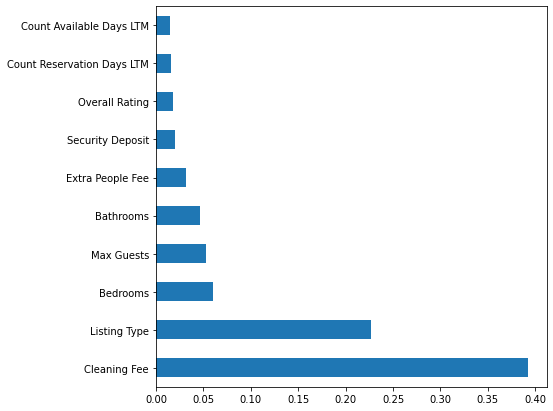

In [ ]:
#Feature importance 
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesRegressor(n_estimators=50)
feature_model.fit(X1_train,lab_enc.fit_transform(y1_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=Night_data.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## PCA

###PCA Average Daily Rate

In [ ]:
ADR_data

,Property Type,Listing Type,Average Daily Rate,Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Overall Rating,Bedrooms,Bathrooms,Max Guests,...,Extra People Fee,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Superhost,check_adr
4,1,1,70.18,0.104,4.0,3.0,5.0,1.0,1.0,5.0,...,25.0,1.0,38.0,328.0,0.0,12.0,0,0,1,0
6,1,1,94.04,0.617,6.0,21.0,4.8,1.0,1.0,2.0,...,50.0,3.0,201.0,125.0,40.0,32.0,0,0,0,0
13,1,2,210.59,0.341,23.0,60.0,4.3,1.0,1.0,4.0,...,75.0,3.0,114.0,220.0,32.0,14.0,0,0,0,0
14,1,2,281.38,0.762,35.0,60.0,4.8,2.0,1.0,6.0,...,25.0,3.0,138.0,43.0,185.0,15.0,0,0,1,0
42,2,1,57.48,0.408,3.0,4.0,5.0,1.0,1.0,2.0,...,10.0,3.0,29.0,42.0,295.0,21.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,1,2,327.00,0.143,1.0,4.0,5.0,1.0,1.5,3.0,...,50.0,3.0,2.0,12.0,17.0,15.0,1,0,0,0
85289,4,2,85.00,0.100,1.0,4.0,5.0,1.0,1.0,4.0,...,30.0,2.0,2.0,18.0,11.0,6.0,1,0,0,0
85391,1,2,145.00,0.067,1.0,1.0,5.0,0.0,1.0,4.0,...,15.0,2.0,2.0,28.0,1.0,11.0,0,0,0,0
85435,1,1,39.40,0.208,2.0,1.0,5.0,1.0,1.0,2.0,...,5.0,2.0,5.0,19.0,7.0,9.0,0,1,0,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train_scaled.shape

(7026, 23)

In [ ]:
pca = PCA(23).fit(X_train_scaled)

In [ ]:
pca_tr = pca.transform(X_train_scaled)

In [ ]:
pca.explained_variance_ratio_

array([1.56403107e-01, 1.36253665e-01, 8.85082259e-02, 7.65220189e-02,
       6.06893864e-02, 4.87607263e-02, 4.50879138e-02, 4.34240731e-02,
       4.32345963e-02, 4.20024029e-02, 3.71988001e-02, 3.50334653e-02,
       3.30634912e-02, 3.09337578e-02, 3.07161225e-02, 2.25072185e-02,
       2.18349186e-02, 1.83960648e-02, 1.05345584e-02, 9.42253196e-03,
       6.37082140e-03, 3.10213386e-03, 3.47998006e-31])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [ ]:
crvalres=[]
num_pcs=[1,2,3,4,5,6,7,8,9,10]
for a in num_pcs:
    reg = LinearRegression()
    crvalreg = cross_validate(reg, pca_tr[:,0:a], y_train, cv=5, scoring='r2')
    crvalres.append(crvalreg['test_score'].mean())

In [ ]:
crvalres

[0.04540220113557194,
 0.44002848849190884,
 0.4760495274290696,
 0.47787345562816663,
 0.47792410363081855,
 0.4823891151422625,
 0.4839196113056435,
 0.4888814614350151,
 0.48974269183764163,
 0.48891636519964843]

In [ ]:
np.argmax(crvalres)

8

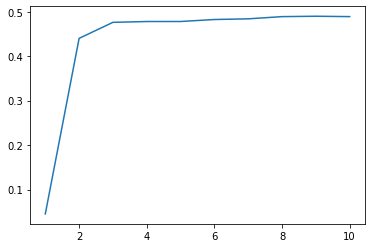

In [ ]:
plt.plot(range(1,11),crvalres)

In [ ]:
for col,val in zip(X.columns,pca.components_[0]):
    print(col,":",val)

Property Type : 0.06715939217467495
Listing Type : 0.11328431761941712
Occupancy Rate LTM : 0.3772489483008062
Number of Bookings LTM : 0.4599289988477669
Number of Reviews : 0.37380129937075746
Overall Rating : 0.020992485929613523
Bedrooms : 0.16321544922179737
Bathrooms : 0.09096867157527609
Max Guests : 0.21154771382741083
Response Rate : 0.13080561987215547
Cancellation Policy : 0.06715939217467513
Security Deposit : 0.0030719574135689397
Cleaning Fee : 0.11816191151574926
Extra People Fee : -0.00686328583190985
Minimum Stay : -0.03710665330775353
Count Reservation Days LTM : 0.4626426215748859
Count Available Days LTM : -0.1913364745718806
Count Blocked Days LTM : -0.199935104743589
Number of Photos : 0.17181695818228648
Business Ready : 0.13974784724654235
Instantbook Enabled : 0.12532018643921317
Superhost : 0.12731076930752716
check_adr : -0.01918174942249425


In [ ]:
for col,val in zip(X.columns,pca.components_[1]):
    print(col,":",val)

Property Type : 0.18542907001100012
Listing Type : 0.2207015711987013
Occupancy Rate LTM : -0.20877310595293436
Number of Bookings LTM : -0.1517381703260099
Number of Reviews : -0.13676844892237758
Overall Rating : -0.007723113520833635
Bedrooms : 0.40641469618010473
Bathrooms : 0.32393779277465834
Max Guests : 0.3973704771194757
Response Rate : -0.009448308113526368
Cancellation Policy : 0.18542907001100067
Security Deposit : 0.2550885381206492
Cleaning Fee : 0.40503509701304596
Extra People Fee : 0.16836003384100998
Minimum Stay : 0.03795568492248231
Count Reservation Days LTM : -0.17377316418493832
Count Available Days LTM : 0.16881830545965756
Count Blocked Days LTM : 0.012124189542024967
Number of Photos : 0.1890521698332329
Business Ready : 0.11149224911918429
Instantbook Enabled : -0.05543917535396222
Superhost : -0.00647683621674308
check_adr : -0.002466120863999122


### PCA Published Nightly Rate

In [ ]:
Night_data

,Property Type,Listing Type,Occupancy Rate LTM,Number of Bookings LTM,Number of Reviews,Overall Rating,Bedrooms,Bathrooms,Max Guests,Response Rate,...,Published Nightly Rate,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Superhost,check_adr
4,1,1,0.104,4.0,3.0,5.0,1.0,1.0,5.0,100.0,...,64.0,1.0,38.0,328.0,0.0,12.0,0,0,1,0
6,1,1,0.617,6.0,21.0,4.8,1.0,1.0,2.0,95.0,...,175.0,3.0,201.0,125.0,40.0,32.0,0,0,0,0
13,1,2,0.341,23.0,60.0,4.3,1.0,1.0,4.0,92.0,...,255.0,3.0,114.0,220.0,32.0,14.0,0,0,0,0
14,1,2,0.762,35.0,60.0,4.8,2.0,1.0,6.0,100.0,...,350.0,3.0,138.0,43.0,185.0,15.0,0,0,1,0
42,2,1,0.408,3.0,4.0,5.0,1.0,1.0,2.0,60.0,...,74.0,3.0,29.0,42.0,295.0,21.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,1,2,0.143,1.0,4.0,5.0,1.0,1.5,3.0,85.0,...,340.0,3.0,2.0,12.0,17.0,15.0,1,0,0,0
85289,4,2,0.100,1.0,4.0,5.0,1.0,1.0,4.0,100.0,...,230.0,2.0,2.0,18.0,11.0,6.0,1,0,0,0
85391,1,2,0.067,1.0,1.0,5.0,0.0,1.0,4.0,100.0,...,275.0,2.0,2.0,28.0,1.0,11.0,0,0,0,0
85435,1,1,0.208,2.0,1.0,5.0,1.0,1.0,2.0,100.0,...,50.0,2.0,5.0,19.0,7.0,9.0,0,1,0,0


In [ ]:
X1_train_scaled.shape

(7026, 23)

In [ ]:
pca = PCA(23).fit(X1_train_scaled)

In [ ]:
pca_tr = pca.transform(X1_train_scaled)

In [ ]:
pca.explained_variance_ratio_

array([1.56403107e-01, 1.36253665e-01, 8.85082259e-02, 7.65220189e-02,
       6.06893864e-02, 4.87607263e-02, 4.50879138e-02, 4.34240731e-02,
       4.32345963e-02, 4.20024029e-02, 3.71988001e-02, 3.50334653e-02,
       3.30634912e-02, 3.09337578e-02, 3.07161225e-02, 2.25072185e-02,
       2.18349186e-02, 1.83960648e-02, 1.05345584e-02, 9.42253196e-03,
       6.37082140e-03, 3.10213386e-03, 3.47998006e-31])

In [ ]:
crvalres=[]
num_pcs=[1,2,3,4,5,6,7,8,9,10]
for a in num_pcs:
    reg = LinearRegression()
    crvalreg = cross_validate(reg, pca_tr[:,0:a], y1_train, cv=5, scoring='r2')
    crvalres.append(crvalreg['test_score'].mean())

In [ ]:
crvalres

[0.04716810633811634,
 0.4600714912662335,
 0.5062958677133539,
 0.5066410728574251,
 0.5064405893093357,
 0.519553628919141,
 0.5226801891400177,
 0.5309487986444896,
 0.5309666207891919,
 0.5303671023057757]

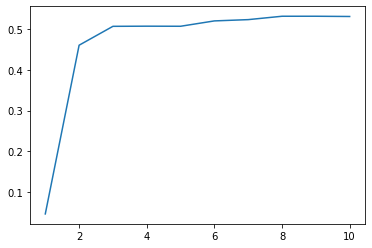

In [ ]:
plt.plot(range(1,11),crvalres)

In [ ]:
np.argmax(crvalres)

8

In [ ]:
for col, val in zip(X1.columns,pca.components_[0]):
  print(col,':',val)

Property Type : 0.06715939217467495
Listing Type : 0.11328431761941712
Occupancy Rate LTM : 0.3772489483008062
Number of Bookings LTM : 0.4599289988477669
Number of Reviews : 0.37380129937075746
Overall Rating : 0.020992485929613523
Bedrooms : 0.16321544922179737
Bathrooms : 0.09096867157527609
Max Guests : 0.21154771382741083
Response Rate : 0.13080561987215547
Cancellation Policy : 0.06715939217467513
Security Deposit : 0.0030719574135689397
Cleaning Fee : 0.11816191151574926
Extra People Fee : -0.00686328583190985
Minimum Stay : -0.03710665330775353
Count Reservation Days LTM : 0.4626426215748859
Count Available Days LTM : -0.1913364745718806
Count Blocked Days LTM : -0.199935104743589
Number of Photos : 0.17181695818228648
Business Ready : 0.13974784724654235
Instantbook Enabled : 0.12532018643921317
Superhost : 0.12731076930752716
check_adr : -0.01918174942249425


## OLS Regression

AS shown, Published Nightly Rate has a better predictive result than Average Daily Rate.

- Nightly Rate: $R^2$= 0.724
- Average Daily Rate: $R^2$ = 0.636

For this reason we chose to run the rest of the models only using Published Nightly Rate.

In [ ]:
#OlS for ADR
from sklearn import linear_model
reg=linear_model.LinearRegression()
adjusted=reg.fit(X_train, y_train)
adjusted.score(X_test,y_test)

0.6358931479539166

In [ ]:
#OLS for Published Nightly Rate
from sklearn import linear_model
reg=linear_model.LinearRegression()
adjusted=reg.fit(X1_train, y1_train)
adjusted.score(X1_test,y1_test)

0.7235650771034409

In [ ]:
#Testing for multicollinearty 
#Using a threshold of >10, we assume there's no multicollinearity between the independent variables.

import statsmodels.api as sm
x_temp = sm.add_constant(X1_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor                    features
0   248.986132                       const
1          inf               Property Type
2     1.380052                Listing Type
3     5.968305          Occupancy Rate LTM
4     5.435010      Number of Bookings LTM
5     2.082400           Number of Reviews
6     1.123257              Overall Rating
7     2.408742                    Bedrooms
8     1.395346                   Bathrooms
9     2.824337                  Max Guests
10    1.061540               Response Rate
11         inf         Cancellation Policy
12    1.218920            Security Deposit
13    1.924783                Cleaning Fee
14    1.154631            Extra People Fee
15    1.034157                Minimum Stay
16    8.589907  Count Reservation Days LTM
17    3.678119    Count Available Days LTM
18    2.328522      Count Blocked Days LTM
19    1.173561            Number of Photos
20    1.124422              Business Ready
21    1.107225         Instantbook Enabled
22    1.128

(array([4.659e+03, 4.017e+03, 9.450e+02, 2.930e+02, 6.700e+01, 3.800e+01,
        6.000e+00, 7.000e+00, 1.000e+00, 5.000e+00]),
 array([  5. ,  54.5, 104. , 153.5, 203. , 252.5, 302. , 351.5, 401. ,
        450.5, 500. ]),
 <a list of 10 Patch objects>)

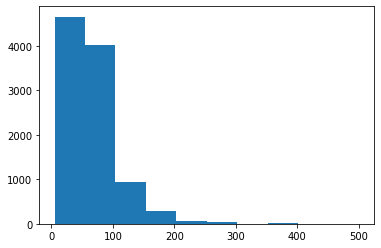

In [ ]:
#Cleaning Fee has strong heteroskedasticity
plt.hist(Night_data['Cleaning Fee'])

In [ ]:
Liner_Regression_results=pd.DataFrame({'Models':['LinerRegression'],
'R2': [adjusted.score(X1_test,y1_test)],
'MSE': [mean_squared_error(adjusted.predict(X1_test), y1_test)],
'MAE': [mean_absolute_error(adjusted.predict(X1_test),y1_test)]})

## Rigde Regression 

Rigde Model: 
- $R^2=0.723$
- $MSE=7136$
- $MAE =53.56$



In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
np.linspace(5,-3,100)

array([ 5.        ,  4.91919192,  4.83838384,  4.75757576,  4.67676768,
        4.5959596 ,  4.51515152,  4.43434343,  4.35353535,  4.27272727,
        4.19191919,  4.11111111,  4.03030303,  3.94949495,  3.86868687,
        3.78787879,  3.70707071,  3.62626263,  3.54545455,  3.46464646,
        3.38383838,  3.3030303 ,  3.22222222,  3.14141414,  3.06060606,
        2.97979798,  2.8989899 ,  2.81818182,  2.73737374,  2.65656566,
        2.57575758,  2.49494949,  2.41414141,  2.33333333,  2.25252525,
        2.17171717,  2.09090909,  2.01010101,  1.92929293,  1.84848485,
        1.76767677,  1.68686869,  1.60606061,  1.52525253,  1.44444444,
        1.36363636,  1.28282828,  1.2020202 ,  1.12121212,  1.04040404,
        0.95959596,  0.87878788,  0.7979798 ,  0.71717172,  0.63636364,
        0.55555556,  0.47474747,  0.39393939,  0.31313131,  0.23232323,
        0.15151515,  0.07070707, -0.01010101, -0.09090909, -0.17171717,
       -0.25252525, -0.33333333, -0.41414141, -0.49494949, -0.57

In [ ]:
#Setting up lambdas
lambdas = 10**np.linspace(5,-3,100)
lambdas

array([1.00000000e+05, 8.30217568e+04, 6.89261210e+04, 5.72236766e+04,
       4.75081016e+04, 3.94420606e+04, 3.27454916e+04, 2.71858824e+04,
       2.25701972e+04, 1.87381742e+04, 1.55567614e+04, 1.29154967e+04,
       1.07226722e+04, 8.90215085e+03, 7.39072203e+03, 6.13590727e+03,
       5.09413801e+03, 4.22924287e+03, 3.51119173e+03, 2.91505306e+03,
       2.42012826e+03, 2.00923300e+03, 1.66810054e+03, 1.38488637e+03,
       1.14975700e+03, 9.54548457e+02, 7.92482898e+02, 6.57933225e+02,
       5.46227722e+02, 4.53487851e+02, 3.76493581e+02, 3.12571585e+02,
       2.59502421e+02, 2.15443469e+02, 1.78864953e+02, 1.48496826e+02,
       1.23284674e+02, 1.02353102e+02, 8.49753436e+01, 7.05480231e+01,
       5.85702082e+01, 4.86260158e+01, 4.03701726e+01, 3.35160265e+01,
       2.78255940e+01, 2.31012970e+01, 1.91791026e+01, 1.59228279e+01,
       1.32194115e+01, 1.09749877e+01, 9.11162756e+00, 7.56463328e+00,
       6.28029144e+00, 5.21400829e+00, 4.32876128e+00, 3.59381366e+00,
      

In [ ]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True,cv=5)
ridgecv.fit(X1_train, y1_train)
ridgecv.alpha_

In [ ]:
ridgecv.alpha_

0.03430469286314912

In [ ]:
ridgemod = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgemod.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.03430469286314912, normalize=True)

In [ ]:
RidgeCV_R2 = ridgemod.score(X1_test,y1_test).round(3)
RidgeCV_MSE = mean_squared_error(ridgemod.predict(X1_test),y1_test).round(3)
RidgeCV_MAE = mean_absolute_error(ridgemod.predict(X1_test),y1_test).round(3)
print('R^2:', RidgeCV_R2)
print('MSE:', RidgeCV_MSE)
print('MAE:', RidgeCV_MAE)

R^2: 0.723
MSE: 7135.877
MAE: 53.56


In [ ]:
Ridge_Regression_results=pd.DataFrame({'Models':['RidgeRegression_CV'],
'R2' : [ridgemod.score(X1_test,y1_test).round(3)],
'MSE' : [mean_squared_error(ridgemod.predict(X1_test),y1_test).round(2)],
'MAE' : [mean_absolute_error(ridgemod.predict(X1_test),y1_test)]})



## Lasso Regression

Lasso Model: 
- $R^2= 0.723$
- $MSE= 7131$	
- $MAE= 53.33$


In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
ols_bfat1 = Lasso(alpha=0,normalize=True)
ols_bfat1.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinat

Lasso(alpha=0, normalize=True)

In [ ]:
mean_squared_error(ols_bfat1.predict(X1_test),y1_test).round(2)

7125.86

In [ ]:
Lassocv = LassoCV(alphas = lambdas, normalize = True,cv=5)
Lassocv.fit(X1_train, y1_train)
Lassocv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.011233240329780266

In [ ]:
Lassomod = Lasso(alpha = Lassocv.alpha_, normalize = True)
Lassomod.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=0.011233240329780266, normalize=True)

In [ ]:
LassoCV_MSE= mean_squared_error(Lassomod.predict(X1_test),y1_test).round(2)
LassoCV_R2=Lassomod.score(X1_test,y1_test).round(3)
LassoCV_MAE = mean_absolute_error(Lassomod.predict(X1_test),y1_test)
print('R^2:', LassoCV_R2)
print('MSE:', LassoCV_MSE)
print('MAE:', LassoCV_MAE)

R^2: 0.723
MSE: 7131.43
MAE: 53.33957754325107


In [ ]:
LassoCV_Results=pd.DataFrame({'Models':['LassoCV'],
'MSE': [mean_squared_error(Lassomod.predict(X1_test),y1_test).round(2)],
'R2': [Lassomod.score(X1_test,y1_test).round(3)],
'MAE' : [mean_absolute_error(Lassomod.predict(X1_test),y1_test)]})

## Bagging 

Bagging Model: 
- $R^2 = 0.719$
- $MSE = 7243$
- $MAE = 49.51$

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
num_trees=np.linspace(50,2000,10)

In [ ]:
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=5).fit(X1_train, y1_train)
    oob_res.append(res.oob_score_)

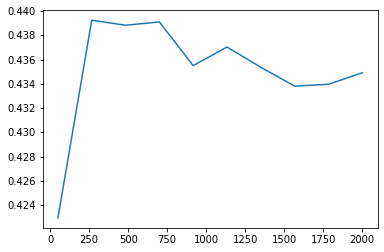

In [ ]:
plt.plot(num_trees,oob_res)

In [ ]:
num_trees[np.argmax(oob_res)]

266.66666666666663

In [ ]:
opt_trs=int(num_trees[np.argmax(oob_res)])
opt_trs

266

In [ ]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(X1_train, y1_train)

In [ ]:
baggingCV_R2=bagging.score(X1_test,y1_test).round(3)
baggingCV_MSE= mean_squared_error(bagging.predict(X1_test),y1_test).round(2)
baggingCV_MAE = mean_absolute_error(bagging.predict(X1_test),y1_test)
print('R^2:', baggingCV_R2)
print('MSE:', baggingCV_MSE)
print('MAE:', baggingCV_MAE)


R^2: 0.719
MSE: 7242.58
MAE: 49.51189976934367


In [ ]:
baggingCV_results= pd.DataFrame({'Models':['Bagging_CV'],
'R2':[bagging.score(X1_test,y1_test).round(3)],
'MSE': [mean_squared_error(bagging.predict(X1_test),y1_test).round(3)],
'MAE': [mean_absolute_error(bagging.predict(X1_test),y1_test).round(3)]})

## Random Forest Model

Random Forest Model:
- $R^2: 0.732$
- $MSE: 6899.98$
- $MAE: 0.732$

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=266,max_features='sqrt',random_state=5).fit(X1_train,y1_train)

In [ ]:
RandomFR_R2=rf.score(X1_test,y1_test)
RandomFR_MSE= mean_squared_error(rf.predict(X1_test),y1_test).round(2)
RandomFRCV_MAE = mean_absolute_error(rf.predict(X1_test),y1_test)
print('R^2:', RandomFR_R2)
print('MSE:',RandomFR_MSE)
print('MAE:', RandomFR_R2)

R^2: 0.7323277621003239
MSE: 6899.98
MAE: 0.7323277621003239


In [ ]:
RandomFR_results=pd.DataFrame({'Models':['RandomForestRegressor'],
'R2':[rf.score(X1_test,y1_test).round(3)],
'MSE': [mean_squared_error(rf.predict(X1_test),y1_test).round(3)],
'MAE' : [mean_absolute_error(rf.predict(X1_test),y1_test).round(3)]})

## Boosting

Boosting Model: $R^2=0.598$


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'learning_rate':[0.1], 'n_estimators':[266], 'max_depth':[1,2,3,4,5]}

In [ ]:
bmod = GradientBoostingRegressor(random_state=5)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=5)

In [ ]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X1_train, y1_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=5),
             param_grid={'learning_rate': [0.1], 'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [266]})

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.207650,0.033626,0.005088,0.000241,0.1,1,266,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.639493,0.217219,0.453012,0.688752,0.644662,0.528628,0.175550,5
1,2.252958,0.006654,0.006465,0.000296,0.1,2,266,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.690361,0.208433,0.572806,0.675099,0.668373,0.563014,0.182046,1
2,3.292504,0.015887,0.008240,0.000449,0.1,3,266,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.706677,0.219019,0.600308,0.578776,0.700619,0.561079,0.178621,2
3,4.327978,0.009505,0.009970,0.000300,0.1,4,266,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.716654,0.227444,0.614199,0.532958,0.677329,0.553717,0.174569,3
4,5.406250,0.028064,0.011617,0.000221,0.1,5,266,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.667373,0.226655,0.572816,0.565839,0.684837,0.543504,0.165572,4


In [ ]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,2.252958,0.006654,0.006465,0.000296,0.1,2,266,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.690361,0.208433,0.572806,0.675099,0.668373,0.563014,0.182046,1


In [ ]:
boost =GradientBoostingRegressor(random_state=5,learning_rate=0.1,n_estimators=266,max_depth=2).fit(X1_train,y1_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
GBR_R2=boost.score(X1_test,y1_test)
GBR_MSE=mean_squared_error(boost.predict(X1_test),y1_test).round(3)
GBR_MAE= mean_absolute_error(boost.predict(X1_test),y1_test).round(2)
print('GBR_R2:', GBR_R2)
print('GBR_MSE:', GBR_MSE)
print('GBR_MAE:', GBR_MAE)

GBR_R2: 0.5834071889387713
GBR_MSE: 10738.816
GBR_MAE: 51.66


In [ ]:
RandomFR_R2=rf.score(X1_test,y1_test)
RandomFR_MSE= mean_squared_error(rf.predict(X1_test),y1_test).round(2)

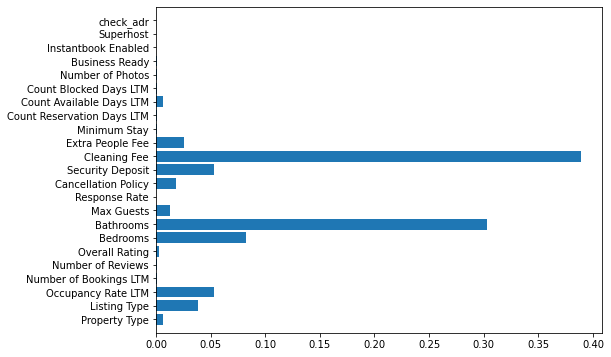

In [ ]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),boost.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

In [ ]:
Gradient_Boosting_results= pd.DataFrame({'Models':['Gradieent_Boosting'],
'R2':[boost.score(X_test,y_test).round(3)],
'MSE': [mean_squared_error(boost.predict(X1_test),y1_test).round(3)],
'MAE' : [mean_absolute_error(boost.predict(X1_test),y1_test).round(3)]})

In [ ]:
Results= pd.concat([Liner_Regression_results, Ridge_Regression_results, LassoCV_Results, RandomFR_results,Gradient_Boosting_results,baggingCV_results], axis=0, ignore_index=True)
Results

,Models,R2,MSE,MAE
0,LinerRegression,0.723565,7125.863887,53.870927
1,RidgeRegression_CV,0.723000,7135.880000,53.560456
2,LassoCV,0.723000,7131.430000,53.339578
3,RandomForestRegressor,0.732000,6899.982000,48.700000
4,Gradieent_Boosting,0.289000,10738.816000,51.661000
5,Bagging_CV,0.719000,7242.580000,49.512000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


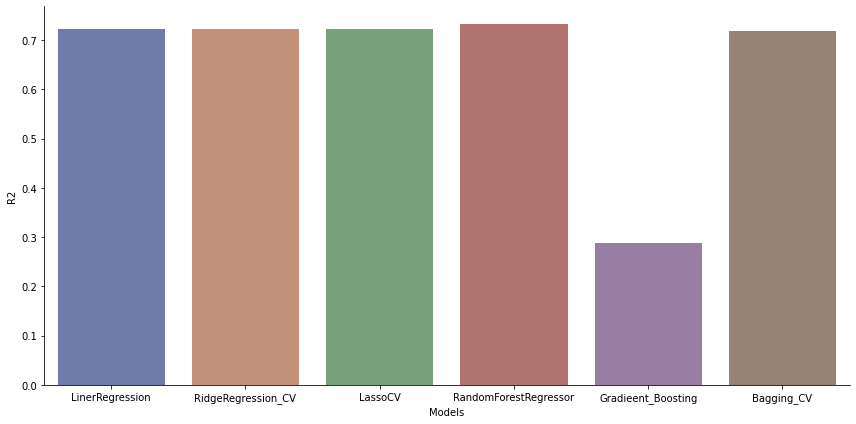

In [ ]:
from matplotlib import rcParams

sns.catplot(
    data=Results, kind="bar",
    x="Models", y="R2", hue="Models",
    ci="sd", palette="dark", alpha=.6, height=6, dodge=False,size=6,aspect=2)

#Abstract

**Goal**

The Goal of this analysis is to create an efficient price predictor using supervised learning algorithms models. I hope that through this analysis helps airbnb property owners to better adjust their rate based on their properties attributes.

**Data Overview**

The data set that I will be utilizing for this analysis is from Airbnb’s New York metropolitan area. The shape of our data is 86009 thousand rows and 46 columns. It comprises 46 different variables; I will only include 36 of these variables which have been chosen based on their ability to predict the price of an Airbnb property in New york. In our analysis I had 5 different price predictors to choose from: Published Nightly rate, Average daily rate, Published Monthly rate, Published Weekly rate and Annual Revenue. I decided that Average Daily Rate(ADR) and Published Nightly Rate (PNR), would be the best predictors for our models.

The ADR variable had 22617 missing values (26%), however instead of dropping these NAs I decided to feature engineer a value to replace them. First I identified the top recurring neighborhoods which accounted for 60% of the missing values in ADR: Williamsburg; Harlem; Brooklyn; Midtown; Bushwick; East Village; Upper West Side; Upper East Side; Crown Heights; Lower East Side; Astoria; Washington Heights.

Then I took the mode of these values and the respective mean. The result I got from these calculations was 87.5, each NA value within ADR was replaced with this value. After this process I decided to drop the rest of the null values resulting in a sample size of 10038, which gives an additional 2471 samples from just dropping all null values (see: data6 vs data5). From this process I created the night_data dataset (relevant columns excluding ADR) and the ADR_data dataset (relevant columns excluding Published Nightly Rate), for their respective prediction models.

Next I tested which dependent variable performed the best in a standard linear regression. The results were that Published Nightly Rate ( 𝑅2=0.723 ) out performed Average Daily Price ( 𝑅2=0.635 ). Our reasoning behind this is that perhaps I could have used a better method for feature engineering to get more similar results.

I ran the rest of the models using the Principal Nightky Rate as the main dependent variable.

**Summary**

For the analysis of this data set, I have chosen to utilize 6 different supervised machine learning models to predict the price of an Airbnb property in New York. For our first model I have chosen a principal component analysis as a dimension reduction technique. From the PCA model I have been able to reduce the amount of linear relationships needed to represent our model down to 3 principal components, however this greatly reduces the predictive power of our models. I theorized that this might be due to the fact that PCA does not take into account classes of information, it purely looks at the variance of each feature.

The second model I used was an OLS Regression technique to help understand the causal relationship between the features of a property on the published nightly rate. The R Squared from this model is 0.72 ~ 72.3%.

Our third model utilizes Ridge Regression to combat the issue of multicollinearity. The R squared from this model is .72 ~ 72.3%. In the fourth model I use a Lasso Regression to help shrink the possibility of overfitting. The R squared from this model is 0.723 ~ 72.3%.

The fourth model is a Random Forest regressor. This technique allows us to fit a number of classifying decisions on various sub-samples of the data set using averaging to improve the accuracy and control for overfitting. The R squared for this model is 0.732 ~ 73.2%.

In the fifth model I use a Gradient boosting model. This model allows for weaker signals to show throughout the model, this also shrinks the data set controlling for overfitting. The R squared for this model is 0.58~58%.

The sixth model I have chosen is Bagging in order to help with bias-variance-trade-off. The R squared for this model is 0.719 ~71%.

After utilizing the 6 different supervised machine learning models I can conclude that the Random Forest regressor is the most efficient model for price prediction of an airbnb property in New York. Its ability to combine ensemble learning with a decision tree framework to create multiple randomly drawn decision trees from the data allowed for the model to be flexible enough to accurately predict Nightly rate. Information that shed light on the price setting controls set by owners and the different types of discounts given by owners based on seasonality. This information would help us better understand price setting for airbnb owners leading to a more accurate price prediction model.

# EDA

In [ ]:
from numpy.lib.function_base import median
from numpy.ma.core import mean
Altpub=data[data['Published Nightly Rate'] <= 500].dropna()
Altpub.shape

(7164, 46)

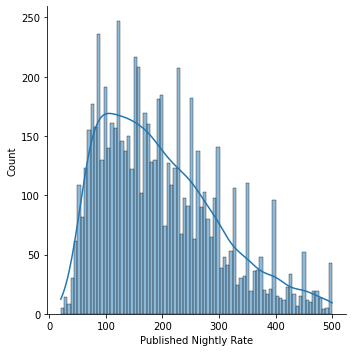

In [ ]:
import seaborn as sns
sns.displot(Altpub['Published Nightly Rate'], bins=82, kde=True)

Distribution of the Published nightly rate and the mean published nightly rate is around 150

In [ ]:
Altpub['Neighborhood'].unique

<bound method Series.unique of 4            Kensington
13          Murray Hill
14         Clinton Hill
42           Kensington
59           Park Slope
              ...      
85268      Williamsburg
85289        Park Slope
85391          Kips Bay
85435          Brooklyn
85503    Sheepshead Bay
Name: Neighborhood, Length: 7164, dtype: object>

In [ ]:
new=Altpub[Altpub['Neighborhood'].isin(['Harlem','Williamsburg','Brooklyn','Midtown','East Village'])]

Text(0.5, 1.0, 'Distribution of Publised Nighly Rate prices for each neighberhood_group')

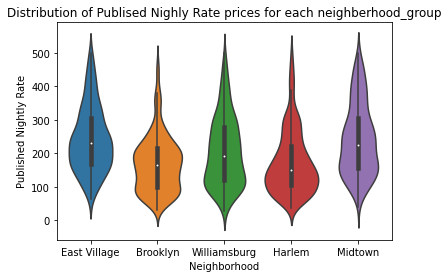

In [ ]:
Plot=sns.violinplot(data=new, x='Neighborhood', y='Published Nightly Rate')
Plot.set_title('Distribution of Publised Nighly Rate prices for each neighberhood_group')

The violin plot shows the publised rate of the top 5 negibourhood(by count)

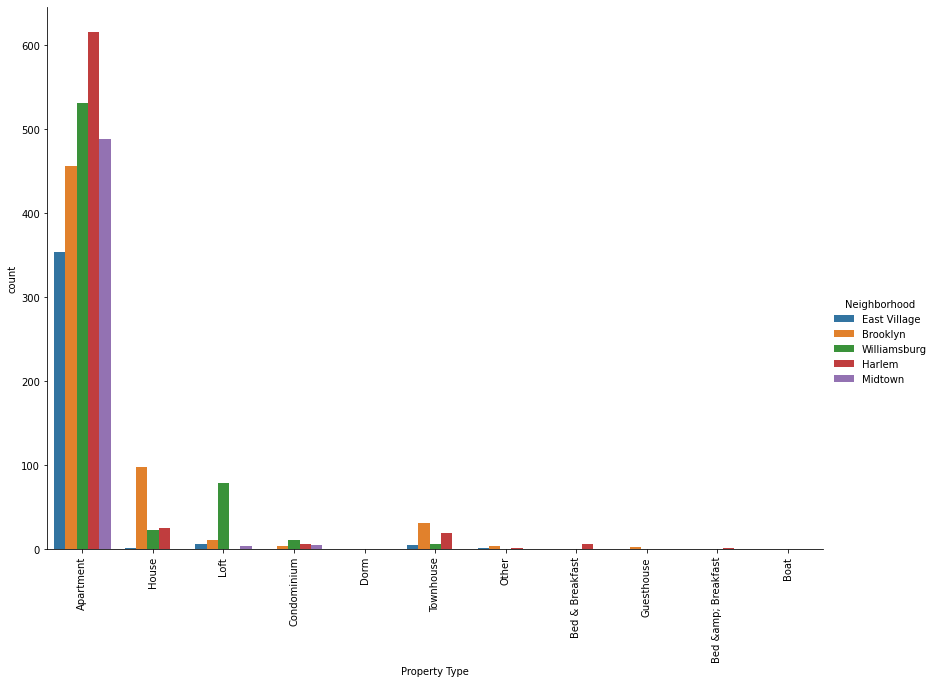

In [ ]:
Plot2=sns.catplot(x='Property Type', hue='Neighborhood', data=new, kind='count',height=8.27, aspect=11.7/8.27)
Plot2.set_xticklabels(rotation=90)

The barchart shows that majority of the property listed on the airbnb in the top 5 neighbourhood in New York majorly rent apartment

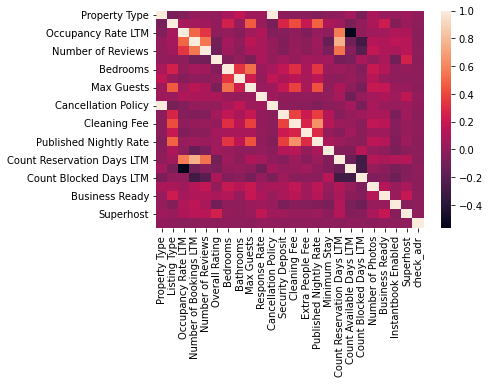

In [ ]:
b=Night_data.corr(method='kendall')
sns.heatmap(b)


Heat map of all the variables

In [ ]:
Corr=Night_data.corr()

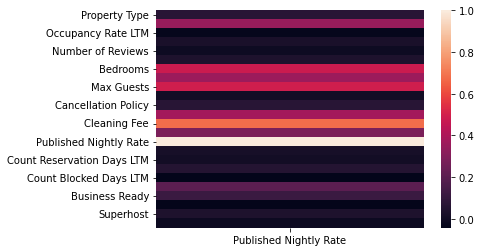

In [ ]:
x=Corr.iloc[:,[14]]
sns.heatmap(x)

Heat map of correlation of Published Nightly Rate

In [ ]:
from wordcloud import WordCloud

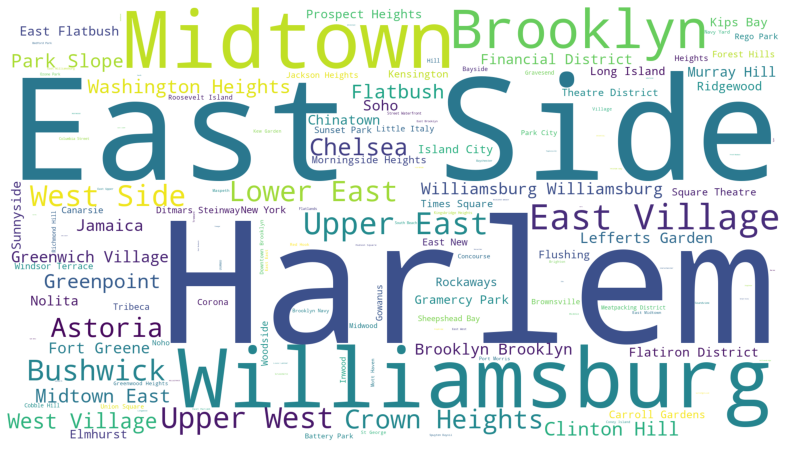

In [ ]:
data18=data.dropna()
plt.subplots(figsize=(15,8))
wordcloud = WordCloud( background_color='white',width=1920,height=1080).generate(" ".join(data18['Neighborhood']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

The world cloud shows that Harlem, East Side, Williamsburg, Midtown and Brooklyn are the most recurring words in the neighbourhood coloum.